In [1]:
import random
import numpy as np
from dataloader import load_CIFAR10
import matplotlib.pyplot as plt
from __future__ import print_function

%load_ext autoreload
%autoreload 2

cifar10_dir = 'datasets/cifar-10-batches-py'

In [2]:
# 读取数据
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
# 抽取一部分数据用作测试
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 1000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [4]:
# 使用knn模型进行训练
from classifier.knn import KNearestNeighbor
classifier = KNearestNeighbor()

k = 1, accuracy = 0.263000
k = 1, accuracy = 0.257000
k = 1, accuracy = 0.264000
k = 1, accuracy = 0.278000
k = 1, accuracy = 0.266000
k = 3, accuracy = 0.239000
k = 3, accuracy = 0.249000
k = 3, accuracy = 0.240000
k = 3, accuracy = 0.266000
k = 3, accuracy = 0.254000
k = 5, accuracy = 0.248000
k = 5, accuracy = 0.266000
k = 5, accuracy = 0.280000
k = 5, accuracy = 0.292000
k = 5, accuracy = 0.280000
k = 8, accuracy = 0.262000
k = 8, accuracy = 0.282000
k = 8, accuracy = 0.273000
k = 8, accuracy = 0.290000
k = 8, accuracy = 0.273000
k = 10, accuracy = 0.265000
k = 10, accuracy = 0.296000
k = 10, accuracy = 0.276000
k = 10, accuracy = 0.284000
k = 10, accuracy = 0.280000
k = 12, accuracy = 0.260000
k = 12, accuracy = 0.295000
k = 12, accuracy = 0.279000
k = 12, accuracy = 0.283000
k = 12, accuracy = 0.280000
k = 15, accuracy = 0.252000
k = 15, accuracy = 0.289000
k = 15, accuracy = 0.278000
k = 15, accuracy = 0.282000
k = 15, accuracy = 0.274000
k = 20, accuracy = 0.270000
k = 20, accu

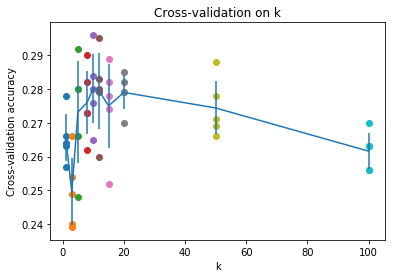

In [5]:
# 交叉验证确定k值
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

k_to_accuracies = {}
for k in k_choices:
    k_to_accuracies[k] = np.zeros(num_folds)
    train_size = X_train.shape[0]
    for i in range(num_folds):
        Xtrain = np.array(X_train_folds[:i] + X_train_folds[i+1:]).reshape([np.int32(train_size * (num_folds-1)/num_folds),-1])
        ytrain = np.array(y_train_folds[:i] + y_train_folds[i+1:]).reshape([np.int32(train_size * (num_folds-1)/num_folds)])
        Xtest = X_train_folds[i]
        ytest = y_train_folds[i]
        
        classifier.train(Xtrain, ytrain)
        ytest_pred = classifier.predict(Xtest, k)
        num_correct = np.sum(ytest_pred == ytest)
        accuracy = float(num_correct) / ytest.shape[0]
        k_to_accuracies[k][i] = accuracy
        
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))
        
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)
    
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [16]:
# 预测
best_k = 10

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / X_test.shape[0]
print('Got %d / %d correct => accuracy: %f' % (num_correct, X_test.shape[0], accuracy))

Got 3386 / 10000 correct => accuracy: 0.338600


In [22]:
# knn hog预测
from feature.hog import hog
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
hog_train = np.array([hog(x) for x in X_train])
hog_test = np.array([hog(x) for x in X_test])
classifier.train(hog_train, y_train)
y_test_pred = classifier.predict(hog_test, k=best_k)

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / X_test.shape[0]
print('Got %d / %d correct => accuracy: %f' % (num_correct, X_test.shape[0], accuracy))

/Users/sunhaohai/Study/SeedClass/数据图像处理课设/project1/feature/hog.py:102: RuntimeWarning: invalid value encountered in true_divide
  hog_vector.append(block_)


Got 4021 / 10000 correct => accuracy: 0.402100


In [24]:
# 使用softmax 分类
from dataloader import get_CIFAR10_data
from classifier.softmax import softmax
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data(cifar10_dir)

In [25]:
results = {}
best_val = -1
best_softmax = None
learning_rates = [1e-7, 5e-7]
regularization_strengths = [2.5e4, 5e4]

for lr in learning_rates:
    for rs in regularization_strengths:
        softmaxClassfier = softmax()
        loss_hist = softmaxClassfier.train(X_train, y_train, learning_rate=lr, reg=rs,
                      num_iters=1000, verbose=False)
        
        y_val_pred = softmaxClassfier.predict(X_val)
        y_train_pred = softmaxClassfier.predict(X_train)
        train_acc = np.mean(y_train == y_train_pred)
        val_acc = np.mean(y_val == y_val_pred)
        results[(lr, rs)] = (train_acc, val_acc)
        if val_acc > best_val:
            best_val = val_acc
            best_softmax = softmaxClassfier
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.339449 val accuracy: 0.352000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.328510 val accuracy: 0.344000
lr 5.000000e-07 reg 2.500000e+04 train accuracy: 0.345571 val accuracy: 0.354000
lr 5.000000e-07 reg 5.000000e+04 train accuracy: 0.331143 val accuracy: 0.334000
best validation accuracy achieved during cross-validation: 0.354000
